# Metoda Monte Carlo 
 - by Tymoteusz Morawiec, 410013

## Dla każdego kolejnego kroku redefiniuje funckję monte_carlo, żeby generować potrzebne dane w danym momencie
 - Mam nadzieję, że kod jest przejrzysty i sensowny
 - W każdej definicji monte_carlo korzystam z rozkładu jednostajnego do generowania puntków
   


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

### Funckja monte_carlo do stworzenia do wizualiacji puntków leżących pod i nad wykresem
 - tworzę dataframe z kolumnami dla X , Y oraz oznaczenia czy punkt jest nad czy pod
 - funckja zwraca dataframe oraz wartość pi

In [9]:
def monte_carlo(n):
    k = 0
    df = pd.DataFrame()
    x_arr = []
    y_arr = []
    label = []
       
    for _ in range(n):
        x = random.uniform(0, 1) # losowanie punktów z rozkładu jednostajnego
        y = random.uniform(0, 1) # tu też
        if x**2 + y**2 <= 1: # sprawdzamy czy punkt znajdue się pod czy nad wykresem
            k += 1
            label.append('inside') # nadajemy adekwatny label
        else:
            label.append('outside')
        x_arr.append(x)
        y_arr.append(y)

    df['X'] = x_arr
    df['Y'] = y_arr
    df['label'] = label # tworzymy dataframe do wizualizacji
    pi = 4 * k / n
    return pi,df


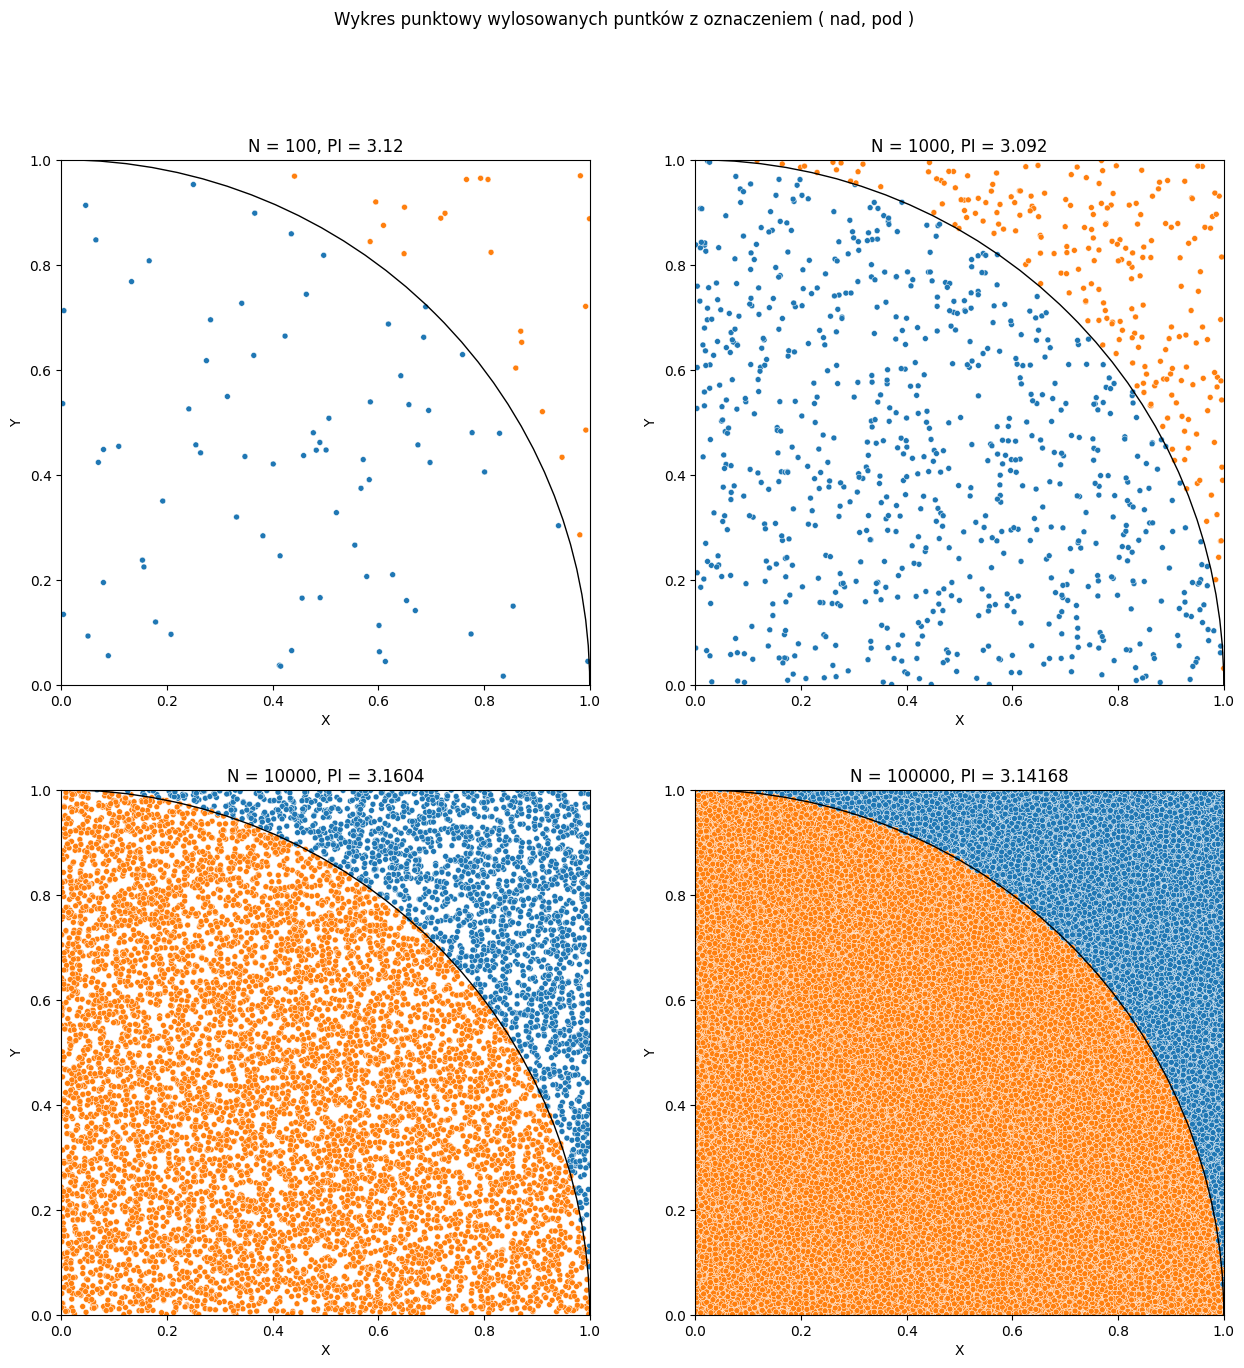

In [11]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
random.seed(10)
for i in range(2, 6):
    n = 10 ** i
    pi, df = monte_carlo(n)
    sns.scatterplot(data=df, x='X', y='Y', hue='label', legend=False, size=1, ax=ax[(i-2)//2][(i-2)%2])
    circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='-')
    ax[(i-2)//2][(i-2)%2].add_patch(circle)
    ax[(i-2)//2][(i-2)%2].set_xlim([0, 1])
    ax[(i-2)//2][(i-2)%2].set_ylim([0, 1])
    ax[(i-2)//2][(i-2)%2].set_title(f"N = {n}, PI = {pi}")
fig.suptitle('Wykres punktowy wylosowanych puntków z oznaczeniem ( nad, pod )')
plt.show()

Wnioski:
- Zgodnie z teorią wraz ze wzrostem ilości iteracji, nasze wyniki coraz bardziej zbliżają się do faktycznej wartości PI, czyli maleje błąd powierzchni pod wykresem


### W kolejnej wersji monte_carlo, tworzę dataframe z chwilową estymowaną wartością PI

In [4]:
def monte_carlo(n,seed = 42):
    random.seed(seed)
    pi = 0
    k = 0
    N = 0
    df = pd.DataFrame()
    pi_arr = []
    for _ in range(n):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        
        if x**2 + y**2 <= 1:
            k += 1
        N += 1
        pi = 4 * k / N # obliczyamy chwilową wartość estymowaną PI
        pi_arr.append(pi)

    df['PI'] = pi_arr
    return df


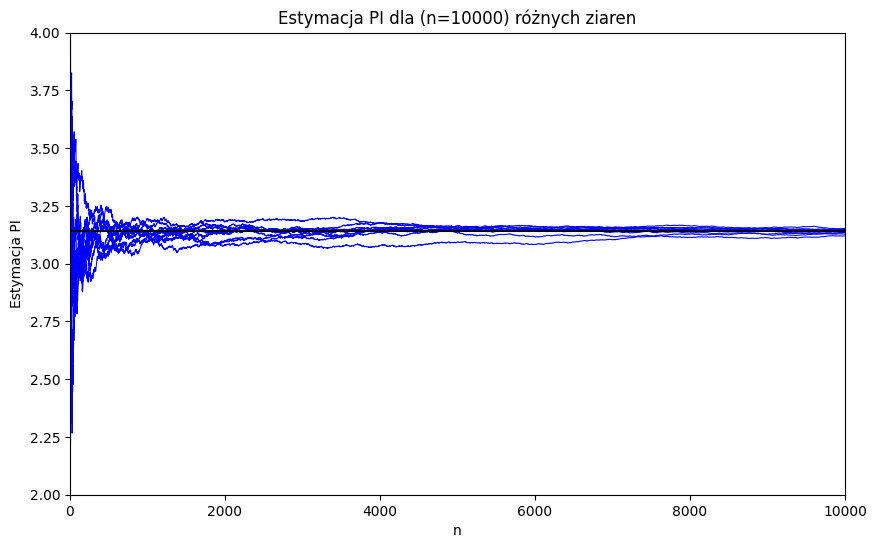

In [5]:
n = 10000
num_seeds = 10
seeds = range(num_seeds)

fig,ax = plt.subplots(figsize=(10, 6))
for seed in seeds:
    df = monte_carlo(n, seed)
    sns.lineplot(data=df, x=df.index, y='PI',color='blue',size=0.5,legend=False)

plt.xlabel('n')
plt.ylabel('Estymacja PI')
plt.title(f'Estymacja PI dla (n={n}) różnych ziaren')
ax.axhline(y=3.14159, color='black', linestyle='-', label='PI')
plt.ylim(2, 4)
plt.xlim(0, n)
plt.show()

Wnioski: 
- ( Ponownie ) Wraz z ilością iteracji rośnie dokładność estymacji wyniku
- Dodatkowo, widzimy, że dla różnych ziaren otrzymujemy różne 'ścieżki' dążenia do PI

### W ostatniej wersji monte_carlo, dodaje do poprzedniej wersji label: seria, żeby w łatwy sposób stworzyć wykresy pudełkowe dla kolejnych eksperymentów

In [6]:
def monte_carlo(n,seed = 42,seria = 1):
    random.seed(seed)
    pi = 0
    k = 0
    N = 0
    df = pd.DataFrame()
    pi_arr = []
    for _ in range(n):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        
        if x**2 + y**2 <= 1:
            k += 1
        N += 1
        pi = 4 * k / N
        pi_arr.append(pi)

    df['PI'] = pi_arr
    df['seria'] = seria
    return df

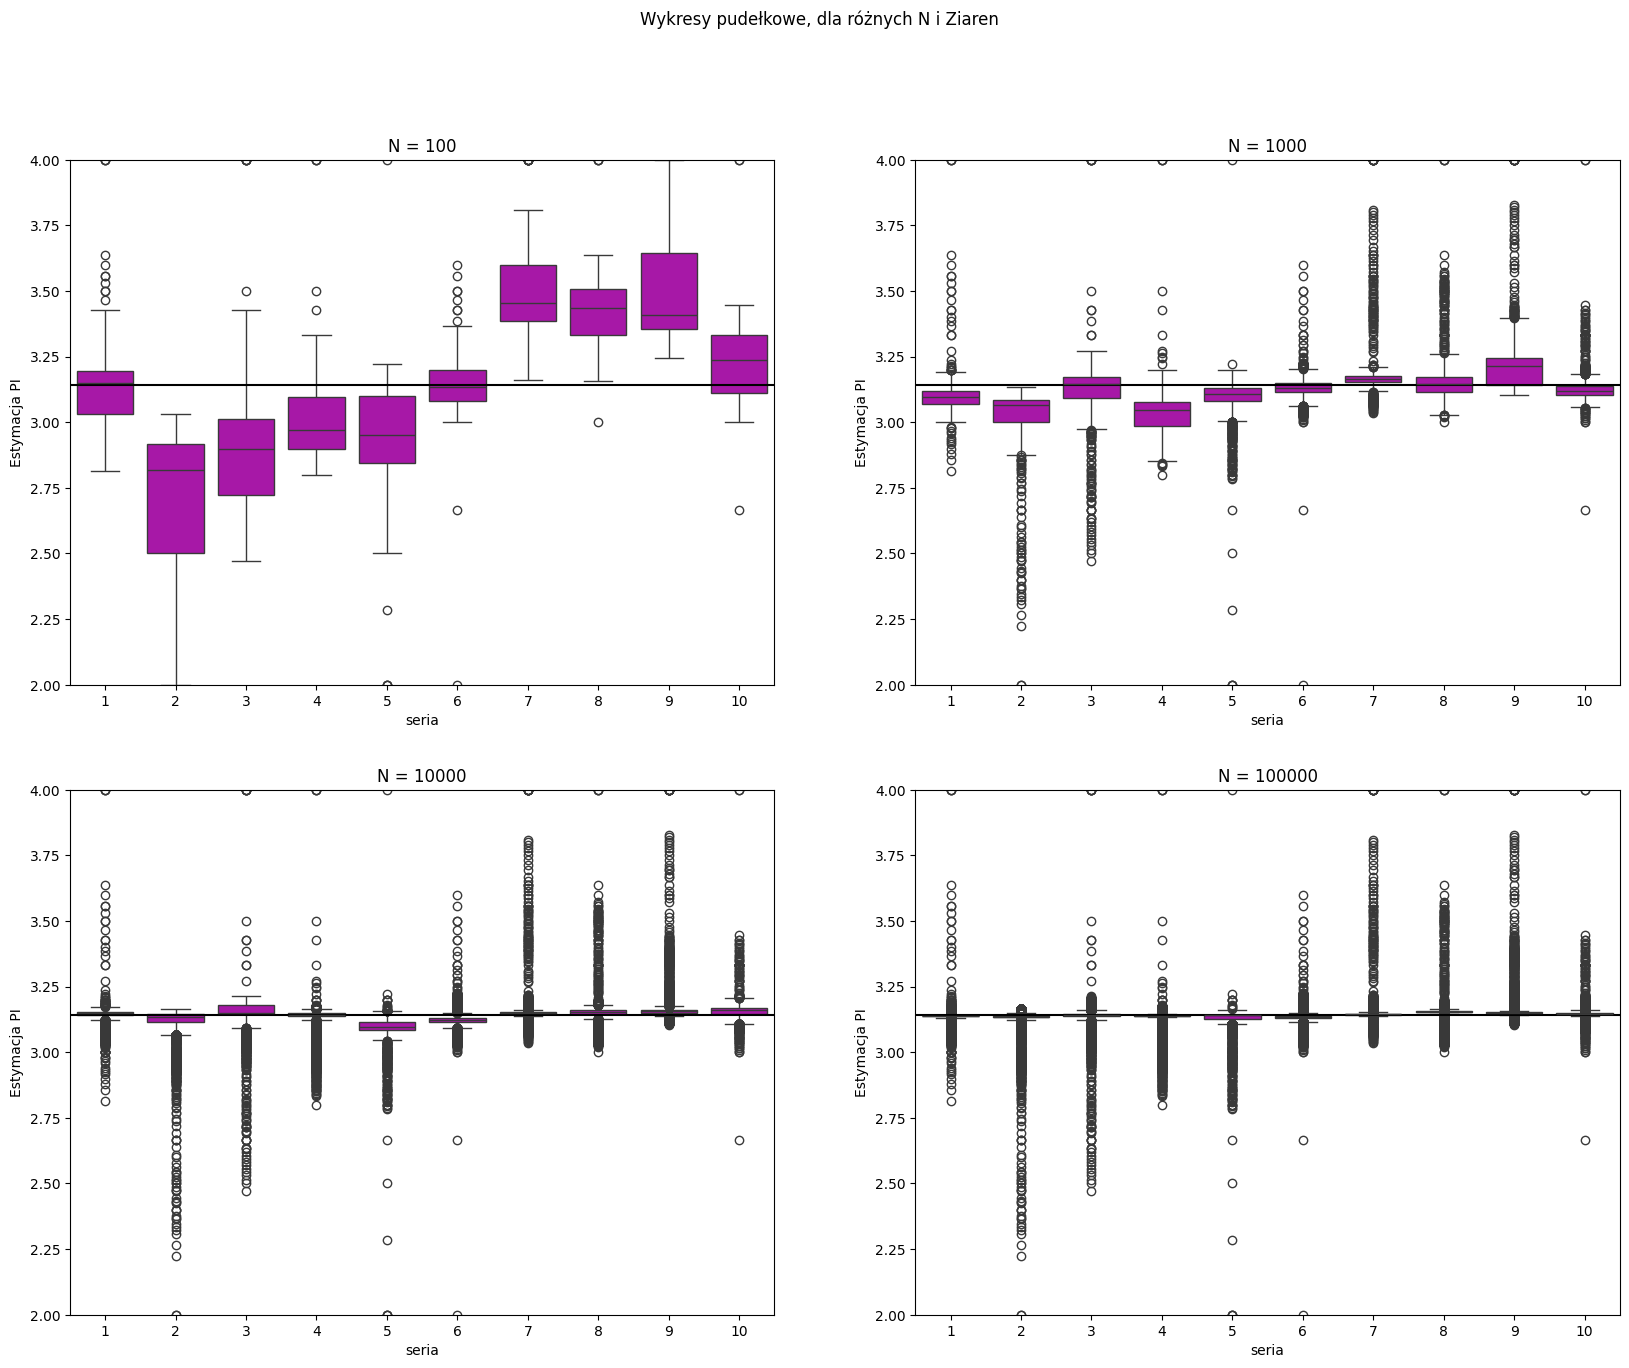

In [7]:
fig,ax = plt.subplots(2,2,figsize=(20,15))
serie = [i for i in range(1,11)]
for i in range(2, 6):
    n = 10 ** i
    df = pd.DataFrame()
    for seria in serie:
        df_to_add = monte_carlo(n,seria,seria)
        df = pd.concat([df,df_to_add])
    sns.boxplot(data=df,x = 'seria',y= 'PI',ax=ax[(i-2)//2][(i-2)%2],color='m')
    ax[(i-2)//2][(i-2)%2].set_ylim([2, 4])
    ax[(i-2)//2][(i-2)%2].set_ylabel('Estymacja PI')
    ax[(i-2)//2][(i-2)%2].axhline(y=3.14159, color='black', linestyle='-', label='PI')
    ax[(i-2)//2][(i-2)%2].set_title(f"N = {n}")
fig.suptitle('Wykresy pudełkowe, dla różnych N i Ziaren')
plt.show()

Wnioski:
- Niezależnie od ziarna dla N > 100000, większość chwilowych estymacji jest bardzo zbliżona do faktycznej wartości PI.
- dla N = 1000, 10000, 100000, Outliery mniej więcej się powtarzają, ponieważ były generowane z tych samych ziaren, po prostu jest ich natuarlnie coraz więcej.
- Dla N =< 1000, Ziarno ma umiarkowany wpływ na estymację
- Dla N >= 1000, Ziarno traci na znaczeniu
- Co tylko utwierdza poprawę jakości wraz ze wzrostem N.
